In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
pd.set_option('display.max_columns', None)

In [44]:
# df_usage = pd.read_csv('IDEAS_DAU-2019-05-01.txt', sep='\t', header=None)
# df_usage = pd.read_csv('IDEAS_DAU-2019-04-01.txt', sep='\t', header=None)
df_usage = pd.read_csv('IDEAS_DAU-2019-06-01.txt', sep='\t', header=None)

In [5]:
df_usage.shape

(5207079, 15)

In [3]:
df_col = pd.read_excel('Columns.xlsx')

In [4]:
cols_name = list(df_col['IDEAS_DAU-2019-06-01'].dropna())

In [5]:
cols_name

['TenantId',
 'DateKey',
 'AU_eslt',
 'AU_exchange',
 'AU_sharepoint',
 'AU_skype',
 'AU_teams',
 'AU_od4b',
 'AU_onenote ',
 'AU_word',
 'AU_excel',
 'AU_powerpoint',
 'AU_outlook',
 'AU_oatp',
 'AU_odsp',
 'AU_officeclient']

In [6]:
cols_name = ['TenantId',
 'DateKey',
 'AU_eslt',
 'AU_exchange',
 'AU_sharepoint',
 'AU_skype',
 'AU_teams',
 'AU_od4b',
 'AU_onenote',
 'AU_word',
 'AU_excel',
 'AU_powerpoint',
 'AU_outlook',
 'AU_oatp',
 'AU_odsp',
 'AU_officeclient']

In [45]:
df_usage.columns = cols_name

In [8]:
workdays_april = 22
workdays_may = 22
workdays_june = 20

In [46]:
df_usage.head()

,TenantId,DateKey,AU_eslt,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_officeclient
0,0005AF2E-E04F-4A8C-9386-D42269FB46D4,6/30/2019 12:00:00 AM,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0005AF2E-E04F-4A8C-9386-D42269FB46D4,6/4/2019 12:00:00 AM,3,3,0,0,0,0,0,0,0,0,0,0,0,0
2,0005AF2E-E04F-4A8C-9386-D42269FB46D4,6/9/2019 12:00:00 AM,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0005AF2E-E04F-4A8C-9386-D42269FB46D4,6/22/2019 12:00:00 AM,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0005AF2E-E04F-4A8C-9386-D42269FB46D4,6/15/2019 12:00:00 AM,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# df_fake = df_usage[df_usage['TenantId'] == '0005AF2E-E04F-4A8C-9386-D42269FB46D4']

In [37]:
# df_fake.sort_values(['DateKey'])

In [12]:
# df_fk = df_usage.iloc[:100,:]

In [13]:
# df_fk.columns

In [47]:
df_MAU = df_usage.groupby('TenantId')['AU_exchange','AU_sharepoint','AU_skype', 'AU_teams','AU_od4b','AU_onenote',
                                   'AU_word','AU_excel','AU_powerpoint','AU_outlook','AU_oatp',
                                   'AU_odsp', 'AU_eslt', 'AU_officeclient'].sum() / workdays_june

In [48]:
df_MAU.head()

,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient
TenantId,,,,,,,,,,,,,,
000009AA-172F-487D-8AA6-272DD352402C,1.50,0.00,0.0,0.0,1.10,0.0,0.30,0.00,0.00,0.05,0.0,1.10,1.50,0.35
00000EE5-4014-458C-940E-7665009FBF21,11.45,8.75,0.0,7.2,0.65,0.0,6.45,5.05,1.60,7.95,0.0,8.75,12.45,9.80
000032CF-080D-4D56-A74B-DDB2895C0E20,22.15,0.00,0.0,0.0,0.00,0.0,0.20,1.20,0.05,7.85,0.0,0.00,22.15,8.30
00003436-E227-4C35-BCF3-20C3BD160978,0.00,0.00,0.0,0.0,0.00,0.0,0.15,0.05,0.00,0.05,0.0,0.00,0.00,0.15
00004281-30BA-4246-9D41-C47E3CB26746,1.45,0.00,0.0,0.0,0.45,0.0,0.15,0.15,0.00,1.45,0.0,0.45,1.65,1.65


In [49]:
df_MAU = df_MAU.reset_index()

In [50]:
# df_MAU.to_csv('IDEAS_MAU-2019-04.csv', index=False)

df_MAU.to_csv('IDEAS_MAU-2019-06.csv', index=False)

In [29]:
df_usage_corr = df_MAU.drop('TenantId', 1)

In [30]:
df_usage_corr.head()

,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient
0,1.363636,0.000000,0.0,0.000000,0.000000,0.000000,0.272727,0.227273,0.090909,0.818182,0.0,0.000000,1.363636,0.818182
1,1.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.090909,0.0,0.000000,1.090909,1.090909
2,1.363636,0.000000,0.0,0.000000,1.000000,0.000000,1.090909,0.000000,0.000000,0.000000,0.0,1.000000,1.363636,1.090909
3,0.318182,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318182,0.0,0.000000,0.318182,0.318182
4,9.181818,7.227273,0.0,0.409091,0.590909,0.227273,5.636364,3.954545,2.000000,6.590909,0.0,7.227273,9.545455,7.863636


In [50]:
# df_usage['DateKet'] = pd.to_datetime(df_usage['DateKey'])

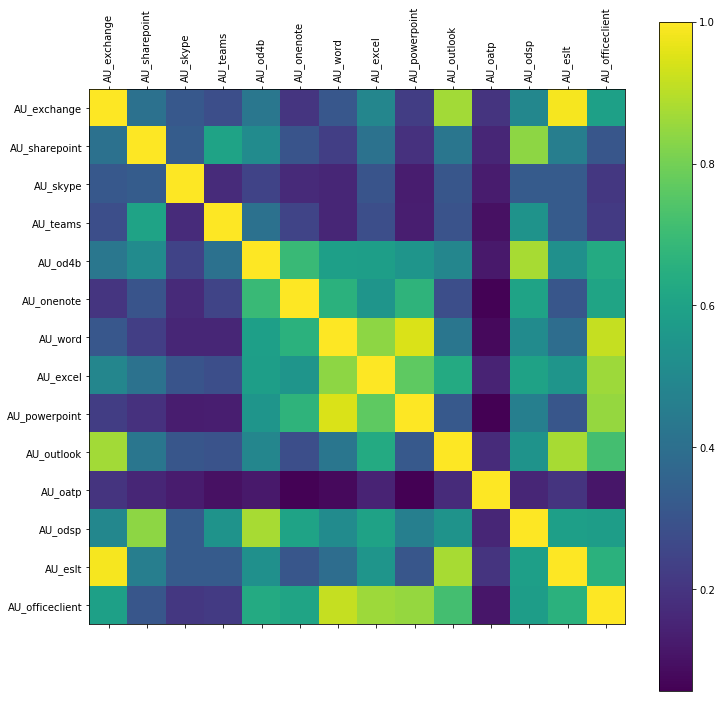

In [42]:
cols = list(df_usage_corr.columns)
matfig = plt.figure(figsize=(12,12))
plt.matshow(df_usage_corr.corr(), fignum=matfig.number)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.colorbar()
matfig.savefig('corr-Usage-04')
plt.show()